# Series
pd.Series(x,index=[],name="")
# Series Attribute
size,shape,dtype,name,index,values,is_unique
df = pd.read_csv('filename',squeeze=True)#convert to series
# Series Method
head(i),tail(i),sample(i),info(),describe()[percentiles=0.30,include="all",exclude=np.number],value_counts(),corr()
# Series Indexing
x[3],x[0:6],x[::-1],x[0]=100,x[[8]]
#
# DataFrame
df = pd.DataFrame(x,index=[])
loc[]as row,iloc[]as col,indexing&att&method same as series
#
# Scatter Matrix
pd.plotting.scatter_matrix(df)
# Qualitative data and Quantitative data
Parallel coordinates : pd.plotting.parallel_coordinates(df,any column,cols=[],color=[]
Cross tabulation :  pd.crosstab(df[],df[],rownames=[],colnames=[])  
#
# Data Cleaning
isna(),isnull(),sum(),dropna()[thresh=2,how="all",subset=[],axis=0/1],fillna()[bfill,ffill,df.mean()],duplicated(),drop_duplicates()

In [20]:
import pandas as pd
a = [1,2,3]
myvar = pd.Series(a)
print(myvar)
print(myvar[0])
myvar1 = pd.Series(a,index=['x','y','z'])
print(myvar1)
print(myvar1['y'])
#if one of the value is float that whole series dtype is float64

0    1
1    2
2    3
dtype: int64
1
x    1
y    2
z    3
dtype: int64
2


In [60]:
import pandas as pd
import numpy as np

ds = pd.read_csv('auto-mpg.csv')
df = pd.DataFrame(ds)
# print(df.head())
# print(df.tail())
# print(df.sample(2))
# print(df.info())
# print(df.describe())                                   #only numerical
# print(df.describe(exclude=np.number))                  #only categorial
# print(df.describe(include="all"))
# print(df.horsepower=="?")
# print(df.duplicated())
# print(df.duplicated().sum())
# print(df.isna())
# print(df.isna().sum())
# df = df.drop(df[df['horsepower']=='?'].index,axis=0)
# print(df.nunique()) 
# print(df.value_counts)                                  #all                                 
# print(df.value_counts())
# print(df['origin'].value_counts())
# print(df['cylinders'].value_counts())
# print(df[['cylinders','origin']].value_counts())
df = df[df['horsepower']!='?']
df['horsepower'] = df['horsepower'].astype('int64')

In [52]:
ds = pd.read_csv('auto-mpg.csv')
df = pd.DataFrame(ds)
print(df.corr())

                   mpg  cylinders  displacement    weight  acceleration  \
mpg           1.000000  -0.775396     -0.804203 -0.831741      0.420289   
cylinders    -0.775396   1.000000      0.950721  0.896017     -0.505419   
displacement -0.804203   0.950721      1.000000  0.932824     -0.543684   
weight       -0.831741   0.896017      0.932824  1.000000     -0.417457   
acceleration  0.420289  -0.505419     -0.543684 -0.417457      1.000000   
model year    0.579267  -0.348746     -0.370164 -0.306564      0.288137   
origin        0.563450  -0.562543     -0.609409 -0.581024      0.205873   

              model year    origin  
mpg             0.579267  0.563450  
cylinders      -0.348746 -0.562543  
displacement   -0.370164 -0.609409  
weight         -0.306564 -0.581024  
acceleration    0.288137  0.205873  
model year      1.000000  0.180662  
origin          0.180662  1.000000  


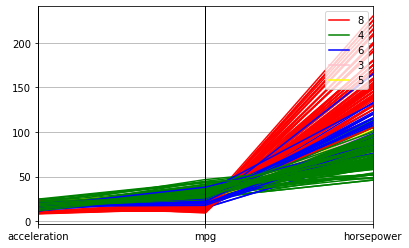

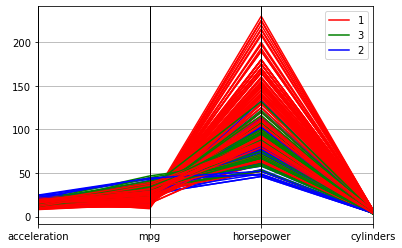

In [68]:
import matplotlib.pyplot as plt

#Scatter Matrix
# pd.plotting.scatter_matrix(df,figsize=[20,20])
# plt.show()

#Qualitative Data vs Quantitative Data
##Qualitative(Categorical)(Nominal & Ordinal Types)
pd.plotting.parallel_coordinates(df,'cylinders',cols=['acceleration','mpg','horsepower'],color=['red','green','blue','pink','yellow'])
plt.show()
pd.plotting.parallel_coordinates(df,'origin',cols=['acceleration','mpg','horsepower','cylinders'],color=['red','green','blue','pink','yellow'])
plt.show()

In [73]:
# plt.boxplot(df[['acceleration','mpg']])
# plt.show()

#Outliers
q1 = df['acceleration'].quantile(0.25)
q2 = df['acceleration'].quantile(0.75)
iqr = q2-q1
lower_bound = q1-1.5*iqr
upper_bound = q2+1.5*iqr
df = df.loc[(df['acceleration']<lower_bound) | (df['acceleration']>upper_bound)]
# plt.boxplot(df['acceleration'])
# plt.show()
print(df)

Empty DataFrame
Columns: [mpg, cylinders, displacement, horsepower, weight, acceleration, model year, origin, car name]
Index: []


In [81]:
d = pd.read_csv('chile.csv')
df = pd.DataFrame(d)
print(df.nunique())
df = df.dropna()
# pd.crosstab(df['sex'],df['education'],rownames='a',colnames='b')
pd.crosstab(df['sex'],df['education'],rownames='a',colnames='b',margins=True,normalize=True)
# pd.crosstab(df['sex'],df['education'],rownames='a',colnames='b',values=df['income'],aggfunc=[min,max,np.mean])

region           5
population      10
sex              2
age             53
education        3
income           7
statusquo     2092
vote             4
dtype: int64


b,P,PS,S,All
a,,,,
F,0.227067,0.075689,0.211436,0.514192
M,0.185109,0.096668,0.204031,0.485808
All,0.412176,0.172357,0.415467,1.000000
